# To plot any graphs

# Delete unnecessary sheets and trim it

In [1]:
import os
from openpyxl import load_workbook

# Specify the root folder containing the Excel files
root_folder = r'D:\Akash\Work\AI\2025\excels'

# List of sheet names to delete
sheets_to_delete = ['内容', '結合データセットのPrecisionグラフ','グラフの説明','結合データセット_グラフ','Recall Curves','情報','結合データセットのグラフ','グラフ',]  # Replace with the names of sheets to delete

# Name of the column to check for the value '1' (e.g., "confidence")
target_column = 'Confidence'  # Replace with the column name if different

# Iterate over all files in the root folder
for file_name in os.listdir(root_folder):
    file_path = os.path.join(root_folder, file_name)
    
    # Process only Excel files
    if file_name.endswith('.xlsx'):
        # Load the workbook
        workbook = load_workbook(file_path)
        
        # Get the list of all sheet names
        sheet_names = workbook.sheetnames
        
        # Delete specified sheets if they exist
        for sheet_name in sheets_to_delete:
            if sheet_name in sheet_names:
                del workbook[sheet_name]
                print(f"Deleted '{sheet_name}' from {file_name}")
        
        # Process all remaining sheets
        for sheet_name in workbook.sheetnames:
            sheet = workbook[sheet_name]
            
            # Look for the row with the value 1 in the target column
            target_row = None
            for row in sheet.iter_rows(min_col=1, max_col=1):  # Adjust `min_col` and `max_col` for your column index
                if row[0].value == 1:
                    target_row = row[0].row
                    break
            
            # Delete rows below the target row
            if target_row is not None:
                sheet.delete_rows(target_row + 1, sheet.max_row - target_row)
                print(f"Trimmed rows below {target_row} in sheet '{sheet_name}' of {file_name}")
        
        # Save the modified workbook
        workbook.save(file_path)
        print(f"Processed: {file_name}")


Trimmed rows below 1001 in sheet 'mix_v2' of confidence_F1_curve.xlsx
Trimmed rows below 1001 in sheet 'v360_v2' of confidence_F1_curve.xlsx
Processed: confidence_F1_curve.xlsx
Trimmed rows below 1001 in sheet 'mix_v2' of confidence_precision_curve.xlsx
Trimmed rows below 1001 in sheet 'v360_v2' of confidence_precision_curve.xlsx
Processed: confidence_precision_curve.xlsx
Trimmed rows below 1001 in sheet 'mix_v2' of confidence_recall.xlsx
Trimmed rows below 1001 in sheet 'v360_v2' of confidence_recall.xlsx
Processed: confidence_recall.xlsx
Processed: IOU_AP.xlsx
Processed: precision_recall.xlsx
Trimmed rows below 7 in sheet '2025_models_detail' of 【LIST】ypsl_models.xlsx
Trimmed rows below 9 in sheet '2025_yolov8-val(mix_v2)' of 【LIST】ypsl_models.xlsx
Trimmed rows below 9 in sheet '2025_yolov8-val(v360_v2)' of 【LIST】ypsl_models.xlsx
Trimmed rows below 9 in sheet 'F1_map' of 【LIST】ypsl_models.xlsx
Trimmed rows below 9 in sheet 'FP-FN_map' of 【LIST】ypsl_models.xlsx
Trimmed rows below 17 i

# Plot from excel

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
from matplotlib.font_manager import FontProperties

# Set up the font properties for CJK support
font_path = r"C:\\Users\\akash_wrozmxh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NotoSansJP-Regular.ttf"
font_prop = FontProperties(fname=font_path)

def plot_from_excel_dict(
    file_path, x_column, y_columns_colors, x_interval=None,
    show_auc=False, save_path=None, x_range=None, y_range=None,
    x_label="", y_label="", title="", sheet_name=""
):
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Extract the x-axis data
    x_data = df[x_column]
    # Initialize AUC values dictionary
    auc_values_dict = {}
    
    # Calculate AUC values if needed
    if show_auc:
        for column in y_columns_colors.keys():
            y = df[column]
            auc_value = auc(x_data, y)
            # auc_value = np.trapz(x_data, y)
            auc_values_dict[column] = auc_value
        
        # Sort by AUC descending
        sorted_columns = sorted(auc_values_dict, key=auc_values_dict.get, reverse=True)
    else:
        sorted_columns = list(y_columns_colors.keys())
    
    # Plot the data
    plt.figure(figsize=(14, 12))
    for column in sorted_columns:
        color, legend_name = y_columns_colors[column]
        y = df[column]
        
        # Prepare the label with AUC value if needed
        label = f"{legend_name} (AUC: {auc_values_dict.get(column, 0):.3f})" if show_auc else legend_name
        
        plt.plot(x_data, y, label=label, color=color)
    
    # Set x-axis intervals if specified
    if x_interval:
        plt.xticks(np.arange(min(x_data), max(x_data) + x_interval, x_interval))
    
    # Set x and y axis limits if specified
    if x_range:
        plt.xlim(x_range)
    if y_range:
        plt.ylim(y_range)
    
    # Set labels and title
    plt.xlabel(x_label, fontproperties=font_prop)
    plt.ylabel(y_label, fontproperties=font_prop)
    full_title = f"{title} - {sheet_name}" if sheet_name else title
    plt.title(full_title, fontproperties=font_prop)
    
    plt.grid(True)
    
    # Add legend, adjusting the position if necessary
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, prop=font_prop)
    plt.legend(
    loc='center left',  # Position to the right of the plot
    bbox_to_anchor=(1.02, 0.5),  # Anchor the legend outside the plot
    ncol=1,  # Single column for legends (one below the other)
    prop=font_prop,  # Use font properties for CJK characters
)
    
    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    plt.show()

In [4]:
x_column = "Confidence"  # Replace with your x-axis column header
x_label = "Confidence"
y_columns_colors = {
            '250124161319_runs_train_yolov8_2025_01_tc1_dataset_01' :("Navy","tc1_dataset_01(tc03_dataset_13のベース)"),  
            '250222153654_runs_train_yolov8_2025_02_tc2_dataset_08':("Black","tc2_dataset_08(tc03_dataset_15のベース)"),
            '250313225525_runs_train_yolov8_2025_03_tc03_dataset_13':("Red","tc03_dataset_13(tc1_dataset_01+OCHuman)"),
            '250315130650_runs_train_yolov8_2025_03_tc03_dataset_15_b32':("Green","tc03_dataset_15_b32(tc2_dataset_08+OCHuman)"),
            # '250127105924_runs_train_yolov8_2025_01_tc1_dataset_12_batch32':("Purple","tc1_dataset_12(インデックス_0_88)"),
            # '250127133419_runs_train_yolov8_2025_01_tc1_dataset_13_batch32':("Magenta","tc1_dataset_13(インデックス_0_90)"),
            # '250128092548_runs_train_yolov8_2025_01_tc1_dataset_14_batch32':("Brown","tc1_dataset_14(インデックス_0_92)"),
            # '250128104301_runs_train_yolov8_2025_01_tc1_dataset_15_batch32':("Blue","tc1_dataset_15(インデックス_0_94)"),
            # '250128114521_runs_train_yolov8_2025_01_tc1_dataset_16_batch32':("Gray","tc1_dataset_16(インデックス_0_96)"),
            # '250126092253_runs_train_yolov8_2025_01_tc1_dataset_17_batch32':("Violet","tc1_dataset_17(インデックス_0_98)"),
            }  
x_interval = 0.2  # Optional, set x-axis interval size 

show_auc = True  # Set True if AUC is required
mix_v2_save_path = r"D:\Akash\Work\AI\2025\TC03\kaiseki\mix_v2"  # Optional, specify the path to save the plot
v360_v2_save_path = r"D:\Akash\Work\AI\2025\TC03\kaiseki\v360_v2"  # Optional, specify the path to save the plot

os.makedirs(mix_v2_save_path,exist_ok=True)
os.makedirs(v360_v2_save_path,exist_ok=True)

x_range = (0, 1)  # Optional, specify the range for the x-axis
y_range = (0, 1)   # Optional, specify the range for the y-axis



# choose f1,precison or recall

In [9]:
types = ["f1", "precision", "recall"]
type = types[2]

Plot saved to D:\Akash\Work\AI\2025\TC03\kaiseki\mix_v2\mix_v2_recall_compare.png


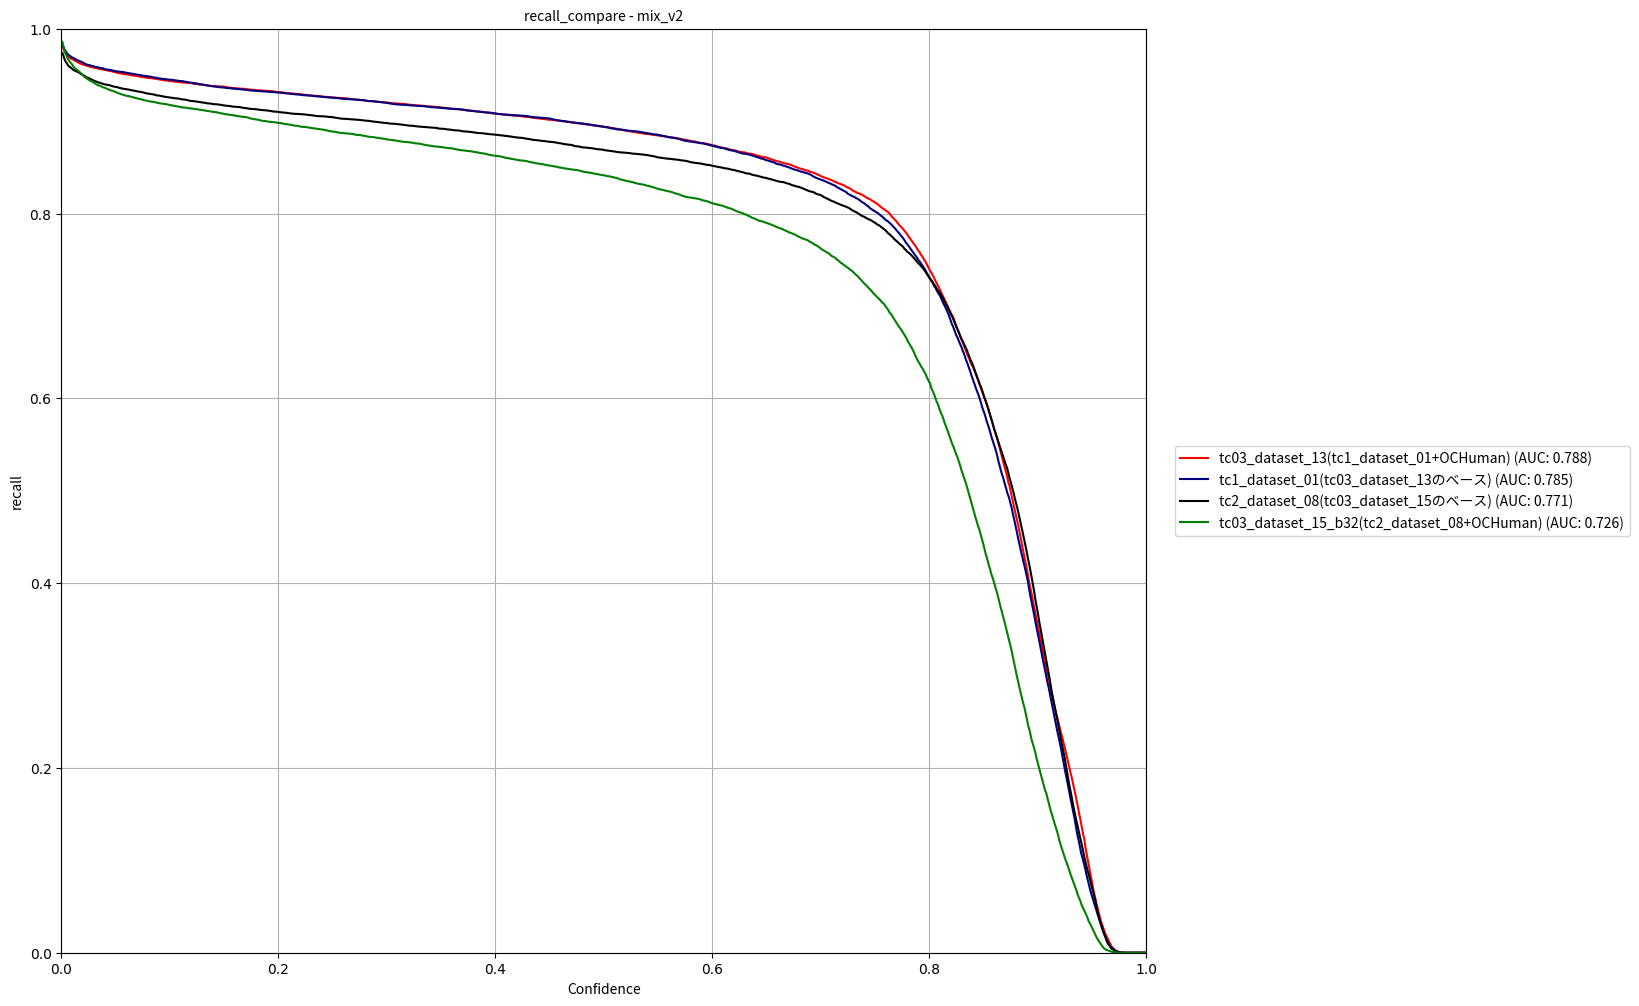

Plot saved to D:\Akash\Work\AI\2025\TC03\kaiseki\v360_v2\v360_v2_recall_compare.png


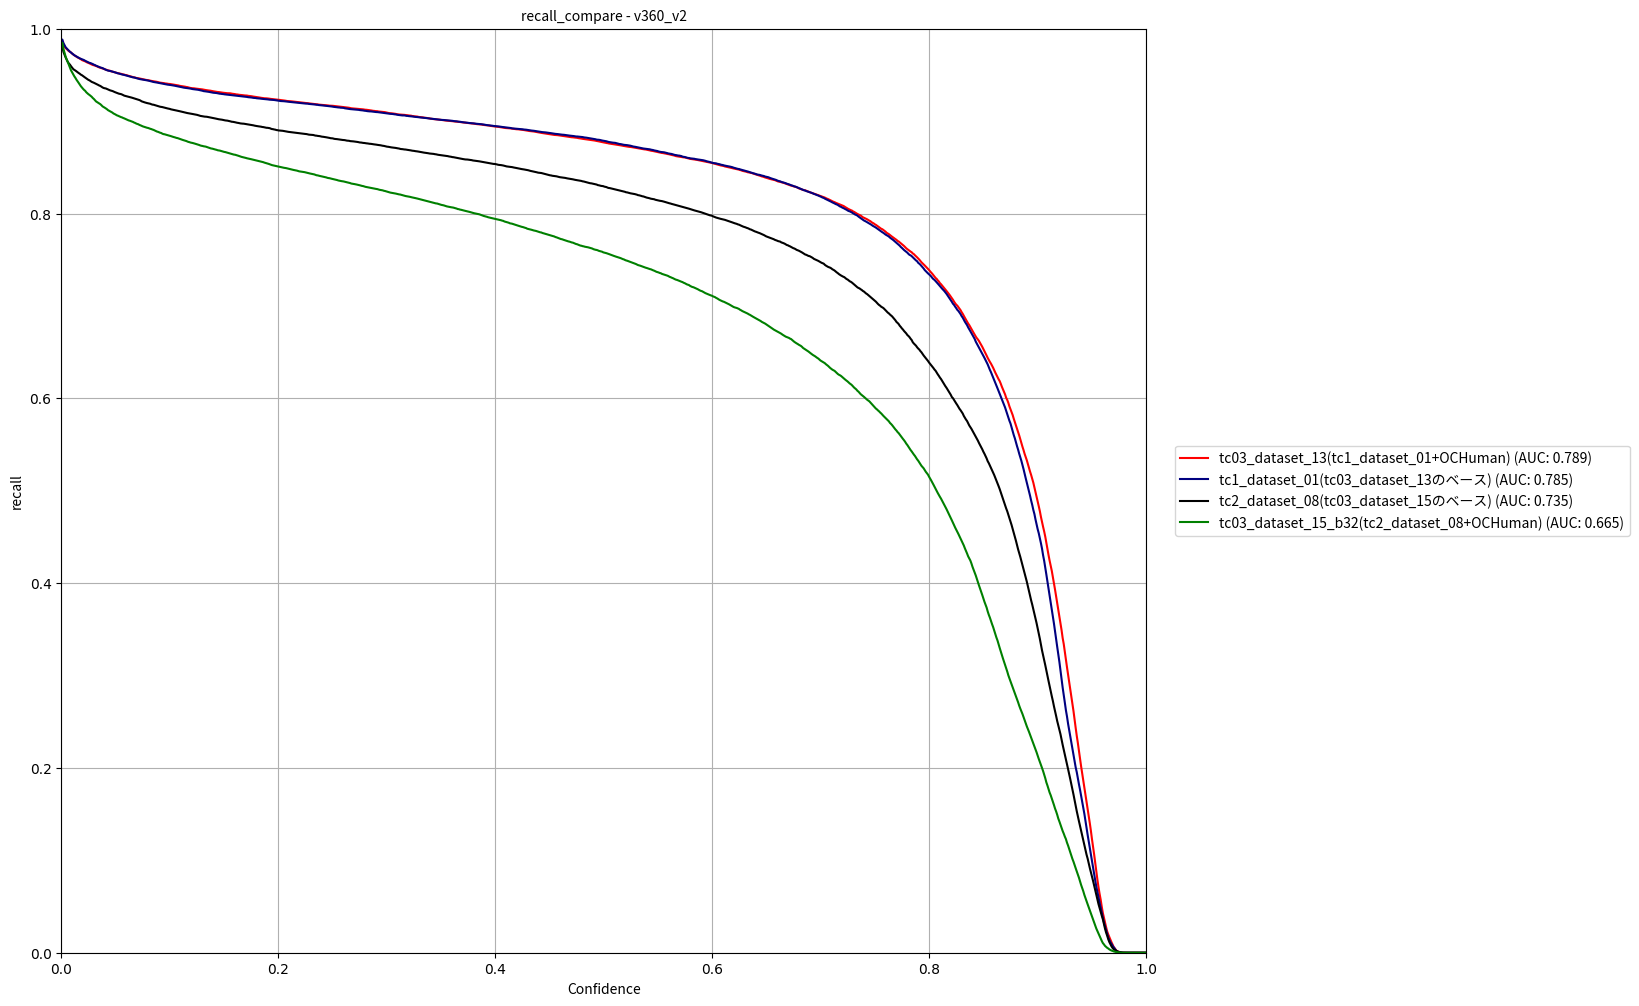

In [10]:
f1_excel = r"D:\Akash\Work\AI\2025\excels\confidence_F1_curve.xlsx"
recall_excel = r"D:\Akash\Work\AI\2025\excels\confidence_recall.xlsx"
precision_excel = r"D:\Akash\Work\AI\2025\excels\confidence_precision_curve.xlsx"

file_path = eval(type+"_excel")
# Open the Excel file to get all sheet names
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Loop through each sheet and generate a plot
for sheet_name in sheet_names:
    # Define the save path for each sheet's plot
    title = type+"_compare"
    y_label = type
    real_save = eval(sheet_name+"_save_path")
    os.makedirs(real_save,exist_ok=True)
    save_path = f"{real_save}\\{sheet_name}_{type}_compare.png" 
 
    plot_from_excel_dict(file_path, x_column, y_columns_colors, x_interval,show_auc, save_path, x_range, y_range,x_label, y_label, title, sheet_name)

## for testing

In [ ]:
file_path_f1 = r"D:\Model_eval\master_data\confidence_F1_curve.xlsx"
file_path_recall = r"D:\Model_eval\master_data\confidence_recall.xlsx"
file_path_precision = r"D:\Model_eval\master_data\confidence_precision_curve.xlsx"

file_path = eval("file_path_"+type)
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

title = type+"_compare"
y_label = type

x_range = (0, 1)  # Optional, specify the range for the x-axis
y_range = (0, 1)   # Optional, specify the range for the y-axis
for sheet_name in sheet_names:
    save_path = f"{save_path_test}\\{sheet_name}_{type}_new.png"
    plot_from_excel_dict(file_path, x_column, y_columns_colors, x_interval,show_auc, save_path, x_range, y_range,x_label, y_label, title, sheet_name)

# zoom

In [9]:
types = ["f1", "precision", "recall"]
type = types[0]

In [ ]:
sheet_name = "結合データセット"
save_path = f"{save_path_test}\\{sheet_name}_{type}_zoom.png"

# x_interval = 0.1
x_range = (0, 0.2)  # Optional, specify the range for the x-axis
y_range = (0, 1)   # Optional, specify the range for the y-axis

plot_from_excel_dict(file_path, x_column, y_columns_colors, x_interval,show_auc, save_path, x_range, y_range,x_label, y_label, title, sheet_name)